# Bussiness Question

1. Bagaimana Grafik Sales dari Tahun ke tahun? Apakah mengalami tren positif atau negatif? Tampilkan juga grafik Sales dengan domain bulan.
2.  Bagaimana Grafik profit dari Tahun ke tahun? Apakah mengalami tren positif atau negatif? Tampilkan juga grafik profit dengan domain bulan.
3. Hubungan antara grafik profit dengan grafik sales dalam domain bulan dan tahun
4. Apakah terdapat kerugian dari penjualan? Jika iya ada berapa banyak?
5. bagaimana kerugian setiap tahunnya
6. Kategori dan sub kategori yang merugi
7. Siapakah Customer dengan Pembelian terbanyak secara frekuensi order selama 4 Tahun? (Tampilkan 5 teratas)
8. Siapakah Customer dengan Pembelian terbanyak secara monetary atau nominal selama 4 Tahun? (Tampilkan 5 Teratas)
9. Negara bagian apa yang paling rendah dari segi profit maupun Sales? (Tampilkan 3 data teratas)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_excel('D:/purwadhika/23/dikumpulin/US superstore data.xls')

In [4]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
data.set_index('Row ID', inplace=True)

In [7]:
data.drop('Product ID', axis = 1, inplace=True)
data.drop('Country', axis = 1, inplace=True)
data.drop('Postal Code', axis = 1, inplace=True)
data.drop('Order ID', axis = 1, inplace=True)
data.drop('Ship Mode', axis = 1, inplace=True)

In [8]:
data.head()

,Order Date,Ship Date,Customer ID,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,
1,2016-11-08,2016-11-11,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,2016-11-08,2016-11-11,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,2016-06-12,2016-06-16,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Nomer 1

In [9]:
#Bagaimana Grafik Sales dari Tahun ke tahun? Apakah mengalami tren positif atau negatif? 

data['year'] = data['Order Date'].dt.year
data['month'] = data['Order Date'].dt.month
data.head(2)

,Order Date,Ship Date,Customer ID,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month
Row ID,,,,,,,,,,,,,,,,,
1,2016-11-08,2016-11-11,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11
2,2016-11-08,2016-11-11,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,11


In [10]:
data['year'] = data['year'].astype('str')
data['month'] = data['month'].astype('str')

<AxesSubplot:xlabel='year'>

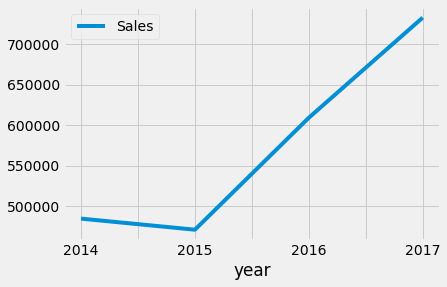

In [11]:
pd.DataFrame(data.groupby('year')['Sales'].sum()).plot()

In [12]:
#Tampilkan juga grafik Sales dengan domain bulan.
data['yearMonth'] = data['year'] + '-' + data['month']
data.head(2)

,Order Date,Ship Date,Customer ID,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month,yearMonth
Row ID,,,,,,,,,,,,,,,,,,
1,2016-11-08,2016-11-11,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11,2016-11
2,2016-11-08,2016-11-11,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,11,2016-11


In [13]:
pd.crosstab(data['yearMonth'], columns='jumlah').sort_values('yearMonth', ascending=False)

col_0,jumlah
yearMonth,
2017-9,459
2017-8,218
2017-7,226
2017-6,245
2017-5,242
2017-4,203
2017-3,238
2017-2,107
2017-12,462


In [14]:
data['month'] = data['month'].astype('int')

<AxesSubplot:xlabel='year,month'>

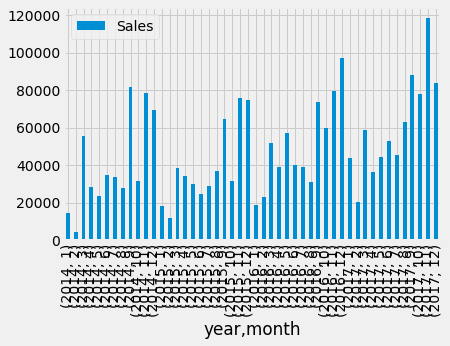

In [15]:
pd.DataFrame(data.groupby(['year','month'])['Sales'].sum()).plot(kind='bar')

## Nomer 2

In [16]:
#Bagaimana Grafik profit dari Tahun ke tahun? Apakah mengalami tren positif atau negatif?

<AxesSubplot:xlabel='year'>

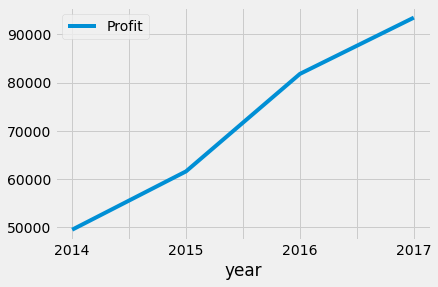

In [17]:
pd.DataFrame(data.groupby('year')['Profit'].sum()).plot()

In [18]:
#Tampilkan juga grafik profit dengan domain bulan

<AxesSubplot:xlabel='year,month'>

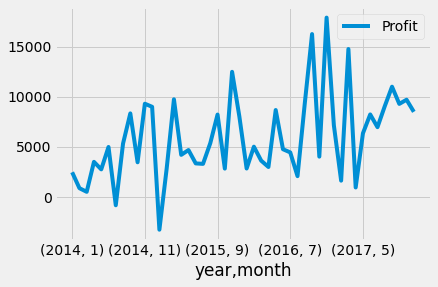

In [19]:
pd.DataFrame(data.groupby(['year','month'])['Profit'].sum()).plot()

## Nomer 3

In [20]:
#Hubungan antara grafik profit dengan grafik sales

In [21]:
#dalam tahun

Text(0, 0.5, 'total')

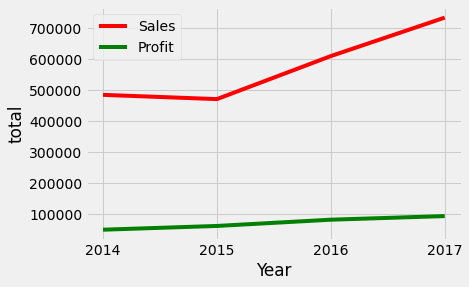

In [22]:
datasales= data.groupby('year')['Sales'].sum().reset_index()
dataprofit= data.groupby('year')['Profit'].sum().reset_index()
ax= sns.lineplot(x='year', y='Sales', data=datasales, color='red')
ax= sns.lineplot(x='year', y='Profit', data=dataprofit, color='green')
plt.legend(labels=["Sales","Profit"])
plt.xlabel("Year")
plt.ylabel("total")

In [23]:
#dalam bulan

Text(0, 0.5, 'total')

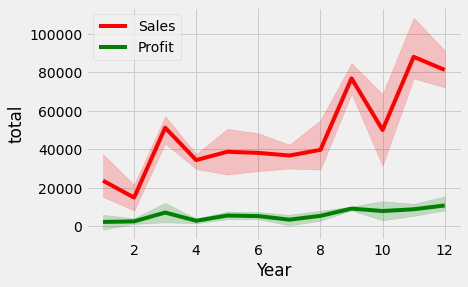

In [24]:
datasalesbulanan= data.groupby(['year', 'month'])['Sales'].sum().reset_index()
dataprofitbulanan= data.groupby(['year', 'month'])['Profit'].sum().reset_index()
ax= sns.lineplot(x='month', y='Sales', data=datasalesbulanan, color='red')
ax= sns.lineplot(x='month', y='Profit', data=dataprofitbulanan, color='green')
plt.legend(labels=["Sales","Profit"])
plt.xlabel("Year")
plt.ylabel("total")

## Nomer 4

In [25]:
#Apakah terdapat kerugian dari penjualan? Jika iya ada berapa banyak?

In [26]:
kerugian = data[data['Profit']<0]
kerugian.count()

Order Date       1871
Ship Date        1871
Customer ID      1871
Customer Name    1871
Segment          1871
City             1871
State            1871
Region           1871
Category         1871
Sub-Category     1871
Product Name     1871
Sales            1871
Quantity         1871
Discount         1871
Profit           1871
year             1871
month            1871
yearMonth        1871
dtype: int64

## Nomer 5

In [27]:
#bagaimana kerugian setiap tahunnya

<AxesSubplot:xlabel='year'>

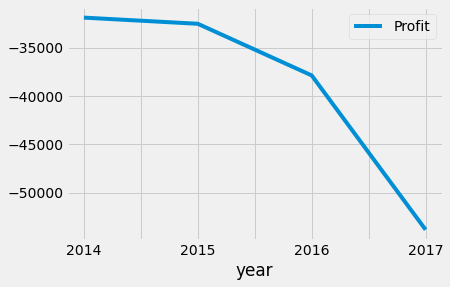

In [28]:
pd.DataFrame(kerugian.groupby('year')['Profit'].sum()).plot()

## Nomer 6

In [29]:
#Kategori dan sub kategori yang merugi

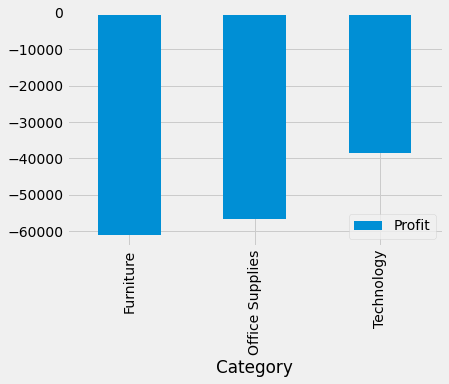

In [30]:
pd.DataFrame(kerugian.groupby('Category')['Profit'].sum()).plot(kind='bar')
plt.savefig('rugi.jpg')

<AxesSubplot:xlabel='Sub-Category'>

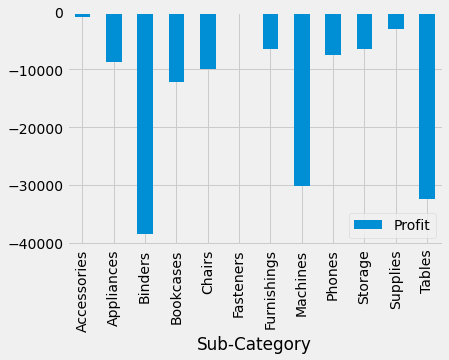

In [31]:
pd.DataFrame(kerugian.groupby('Sub-Category')['Profit'].sum()).plot(kind='bar')

## Nomer 7

<AxesSubplot:xlabel='Customer Name'>

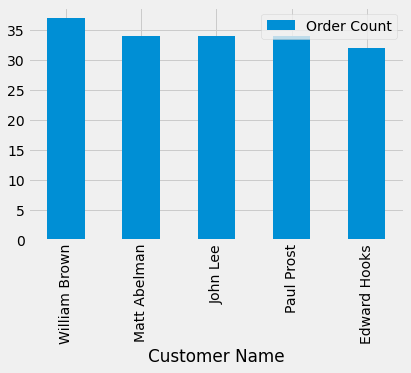

In [32]:
#Siapakah Customer dengan Pembelian terbanyak secara frekuensi order selama 4 Tahun? (Tampilkan 5 teratas)
nomer5 = pd.DataFrame(data.groupby('Customer Name')['Customer ID'].count())
nomer5.rename(columns={'Customer ID': 'Order Count'}, inplace=True)
nomer5.sort_values(by='Order Count', ascending=False, inplace=True)
nomer5.head().plot(kind='bar')

## Nomer 8

<AxesSubplot:xlabel='Customer Name'>

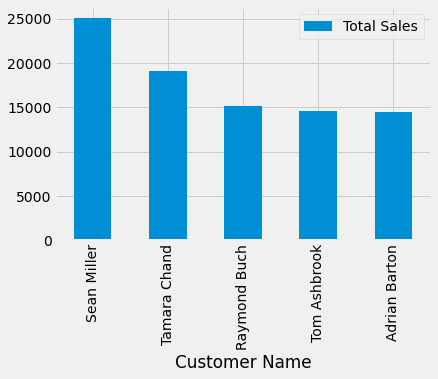

In [33]:
#Siapakah Customer dengan Pembelian terbanyak secara monetary atau nominal selama 4 Tahun? (Tampilkan 5 Teratas)
nomer6 = pd.DataFrame(data.groupby('Customer Name')['Sales'].sum())
nomer6.rename(columns={'Sales': 'Total Sales'}, inplace=True)
nomer6.sort_values(by='Total Sales', ascending=False, inplace=True)
nomer6.head().plot(kind='bar')

## Nomer 9

In [34]:
#Negara bagian apa yang paling rendah dari segi profit maupun Sales? (Tampilkan 3 data teratas)
nomer9 = data.groupby('State').agg({
    'Profit' : 'sum',
    'Sales':'sum'
})

<AxesSubplot:xlabel='State'>

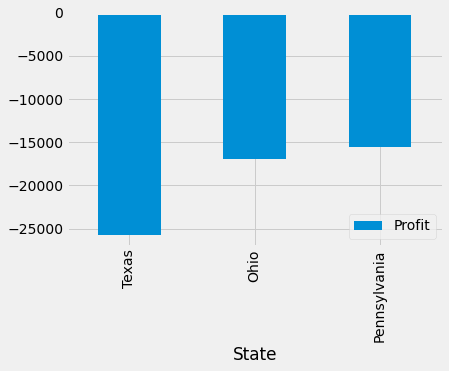

In [35]:
#profit
pd.DataFrame(nomer9['Profit']).sort_values(by='Profit').head(3).plot(kind='bar')

<AxesSubplot:xlabel='State'>

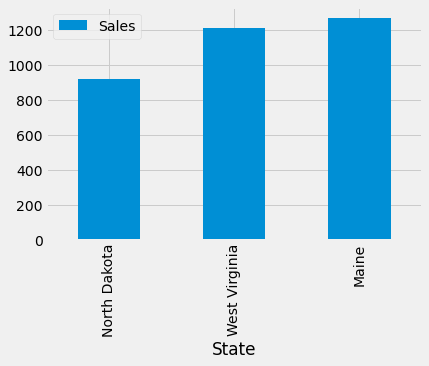

In [36]:
#sales
pd.DataFrame(nomer9['Sales']).sort_values(by='Sales').head(3).plot(kind='bar')